In [1]:
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sb
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import math
# All the librories 


ModuleNotFoundError: No module named 'numpy'

In [2]:
data_raw = pd.read_csv("~/downloads/diabetes1.csv") # load the dataset along with the path

In [3]:
data_raw.shape    # dimensions (columns x rows)
data_raw.info()   # all info (Dtype, non-null etc...
data_raw.head(22) # first 22 rows
# short data analysis on the dataset, check for NaN and a short preview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


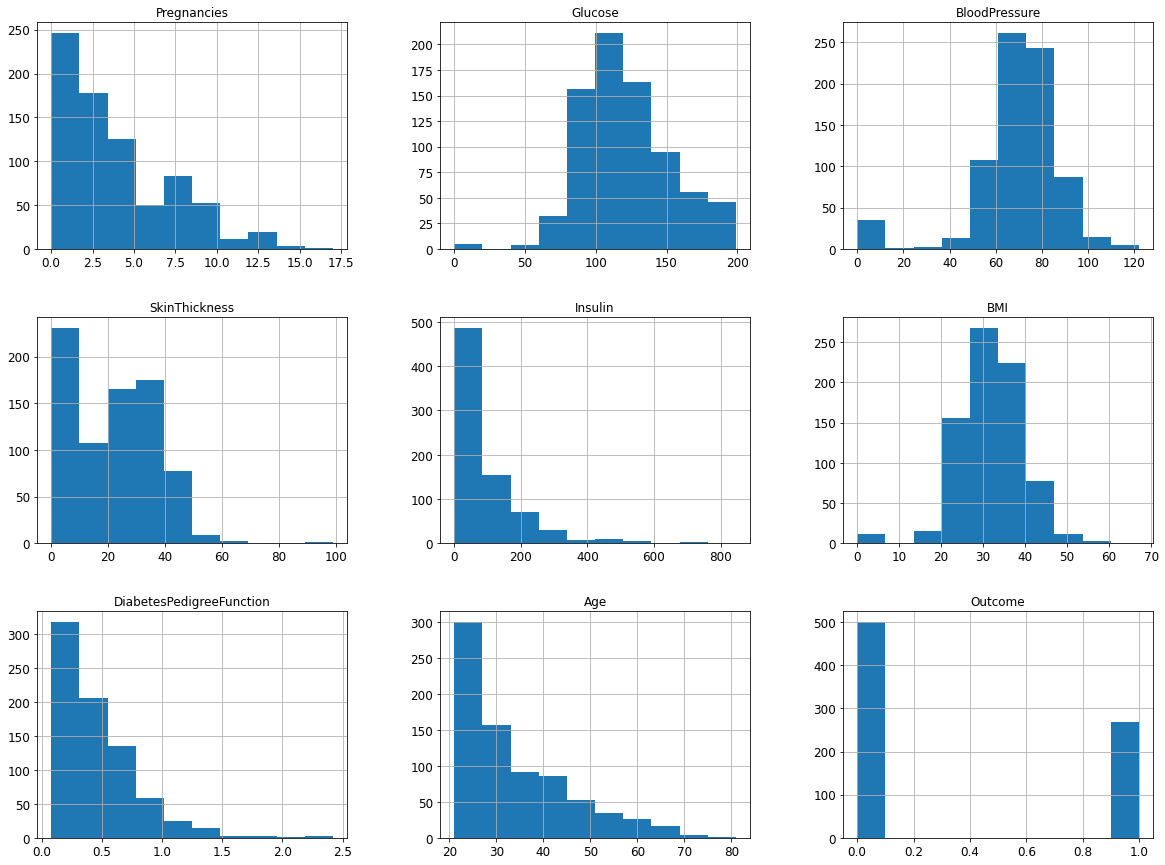

<Figure size 432x288 with 0 Axes>

In [4]:
# histograms for all the columns
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

data_raw.hist(figsize=(20,15))
plt.figure();

In [5]:
data_raw.describe()
# .discribe returns all the numerical parameters on the dataset, meadian, mode, total inputs, min, max...

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2.	Do a visualization of the “Outcome” column using countplot.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

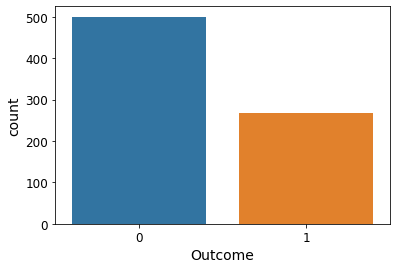

In [6]:
sb.countplot(x ='Outcome',data = data_raw)


"""alternative visualisation"""
#plt.title('Outcome', fontsize=12)  

# sb.set_theme(style = 'whitegrid')     # SB-1 

# bplot = sb.catplot(
#     data = data_raw, kind = 'bar',
#     x = 'Outcome' , hue = 'Outcome',
#     ci = 'sd', palette = 'dark', alpha =.5, height=6)

# bplot.despine(left=True)
# bplot.set_axis_labels('', 'Outcome')


# this visualisation shows positive to negative results ratio
# "Outcome" 1 = positive,  0 = negative

[(0.0, 15.0), Text(0.5, 0, 'Total outcomes')]

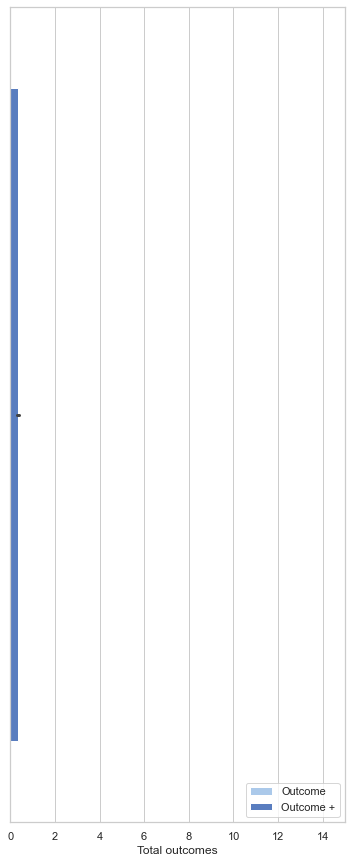

In [7]:
sb.set_theme(style='whitegrid')

f, ax = plt.subplots(figsize=(6,15))

sb.set_color_codes('pastel')
sb.barplot(x='Outcome', data = data_raw,
           label = 'Outcome', color = 'b')

sb.set_color_codes("muted")
sb.barplot(y='Outcome', data = data_raw,
           label = 'Outcome +', color = 'b')

ax.legend(loc = 'lower right')
ax.set(xlim=(0,15),
       xlabel= 'Total outcomes')

3.	Check the correlation between the features using heatmap.

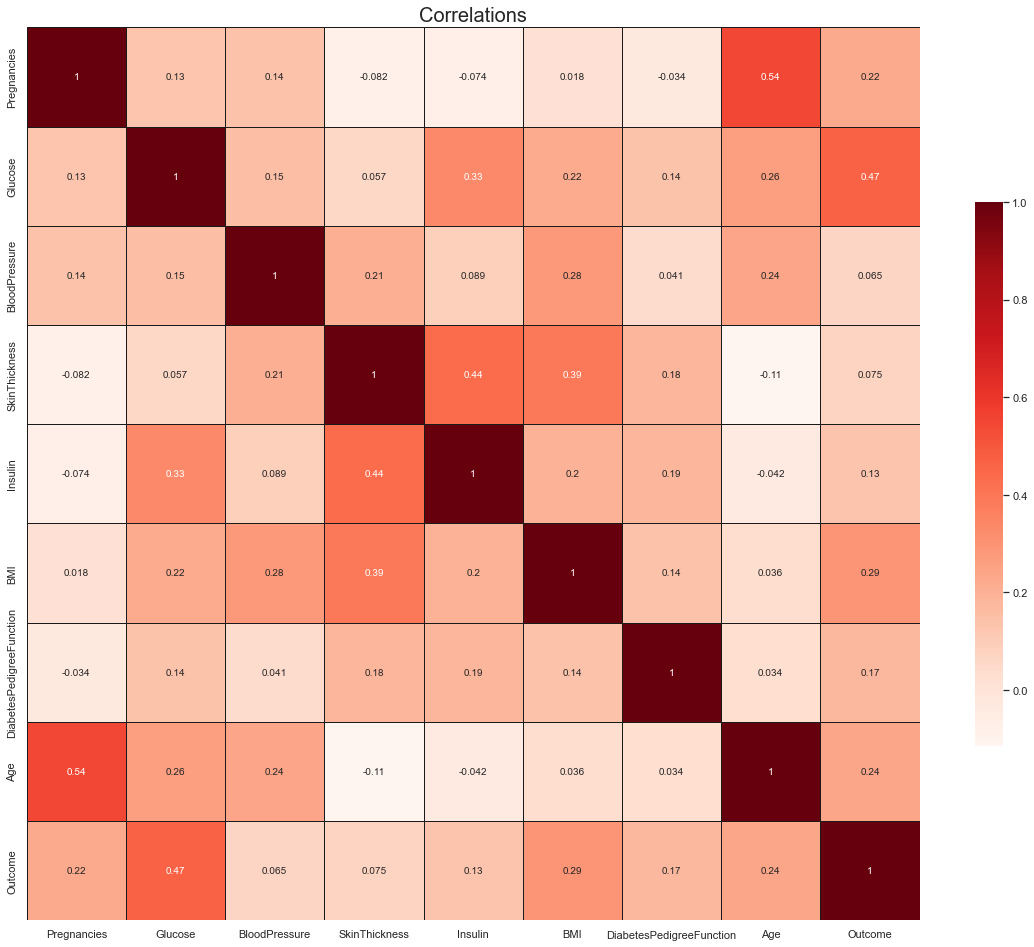

In [8]:
%matplotlib inline

# font size and title
f, axes = plt.subplots(figsize=(20,20))
plt.title('Correlations', fontsize=20)

# correlation on all the features

Features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# visualisation

sb.heatmap(data_raw[Features].corr(),
           linewidths = 1,  # distance between the lines
           square = True,   # squared tiles
           cmap = 'Reds',   # color
           linecolor = 'k', 
           annot = True,
           annot_kws={'size':10},
           cbar_kws={'shrink': 0.5});
           

4.	Create k-NN algorithm and find the training set accuracy and testing set accuracy.

In [9]:
# train test split
from sklearn.model_selection import train_test_split 

label_columns = ['Outcome']

training_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                    'BMI', 'DiabetesPedigreeFunction', 'Age']

X_train, X_val, y_train, y_val = train_test_split(data_raw[training_columns],
                                                  data_raw[label_columns],
                                                  random_state = 42) 

print(f'Original set:   {data_raw.shape}')
print('-------------------------------------')
print(f'Training features:   {X_train.shape}')
print(f'Validation features:   {X_val.shape}')
print(f'Training labels:   {y_train.shape}')
print(f'Validation labels:   {y_val.shape}')

# dataset is split between train and val (test)
# print on .shape to verify the splt

Original set:   (768, 9)
-------------------------------------
Training features:   (576, 8)
Validation features:   (192, 8)
Training labels:   (576, 1)
Validation labels:   (192, 1)


In [10]:
from math import sqrt 

# bootstrap is used to find the optimal k-nn
k_num = round(sqrt(X_train.shape[0])) # 24 is optimal k-nearest neighbor
print(k_num)

# k-nn it has to be odd
if k_num % 2 ==0:
    k_num += 1
    

24


In [11]:
from sklearn.neighbors import KNeighborsClassifier
# KNN model

knn = KNeighborsClassifier(n_neighbors = int(k_num))
knn.fit(X_train, np.ravel(y_train))
    
# Accuracy score: train
print('Train set accuracy:   {:.3f}%'.format(knn.score(X_train, y_train)))

# Accuracy score: test
print('Test set accuracy:   {:.3f}%'.format((knn.score(X_val , y_val))))       

Train set accuracy:   0.773%
Test set accuracy:   0.703%


5.	Visualize the accuracy from both (training and testing datasets) in one plot. 
(Maybe you will find the best number of n_neighbors parameter with this visualization?)


In [12]:
# pip install yellowbrick
# import yellowbrick
# from yellowbrick.cluster import KElbowVisualizer  


F:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
F:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
F:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
F:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

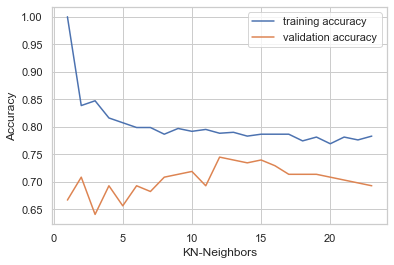

In [13]:

train_acc = []
test_acc = []
neighbors_settings = range(1, 24)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train, y_train)                                 
    train_acc.append(knn.score(X_train, y_train))             
    test_acc.append(knn.score(X_val, y_val))
            

plt.plot(neighbors_settings, train_acc, label="training accuracy")
plt.plot(neighbors_settings, test_acc, label="validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("KN-Neighbors")
plt.legend()
plt.show()
                    


6.	Additionally, do the same using Logistic regression and Decision Tree algorithms.
    

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn. metrics import accuracy_score


log_reg = LogisticRegression(solver='sag', C = 0.05, max_iter = 10000)    # variable for logistic regression with default values
log_reg.fit(X_train, np.ravel(y_train))                                   # fit the train data

grid = [{'solver': ['liblinear'],
         'penalty' : ['l1','l2'], # l1 = laso
         'C': [0.001, 0.01, 0.1, 1, 2, 5, 10, 15, 20, 50, 100]},          # input "all" the available parameters
        {'solver': ['sag'],
         'penalty':['l2'],  # l2 = ridge
         'C': [0.001, 0.01, 0.1, 1, 2, 5, 10, 15, 20, 50, 100],
         'max_iter': [10000]}]


search = GridSearchCV(log_reg, param_grid = grid, scoring = 'f1', cv = 5) # GridSearchCV model for optimization trough cross-validation
search.fit(X_train, np.ravel(y_train));                                   # the train data in to search

print('Best parameters:  {} '.format(search.best_params_))
print('\n\n ----------------')

predict = log_reg.predict(X_val)
acc = accuracy_score(y_val, predict)
print('Accuracy:   {:.0f}%'.format(np.round(acc * 100)))


Best parameters:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'} 


 ----------------
Accuracy:   69%


In [15]:
from sklearn.tree import DecisionTreeClassifier         

tree = DecisionTreeClassifier(random_state = 42)         # decision tree with random state
tree.fit(X_train, np.ravel(y_train))                     # fit the train data

pred_tree = tree.predict(X_val)                          # predict

score = tree.score(X_val, y_val)                         # score

print('Accuracy:   {:.0f}%'.format(score * 100))     

Accuracy:   71%


In [16]:
#conda install graphviz
#conda install conda-forge pydotplus

In [28]:
import six
from six import StringIO
from IPython.display import Image, display
import pydotplus as pdotp
from sklearn.tree import export_graphviz
import networkx as nx
# every librory needed to depict a decision tree

def plot_tree(model, image):                             
    dot_data = StringIO()
    export_graphviz(model, out_file = dot_data,
                    filled = True,
                    rounded = True,
                    special_characters = True,
                    feature_names = X_train.columns.values.tolist(),
                    class_names = ['0', '1'])
    
    
    
    graph = pdotp.graph_from_dot_data(dot_data.getvalue())
    graph.write_png("diabetes.png") 
    Image(graph.create_png())
    
    


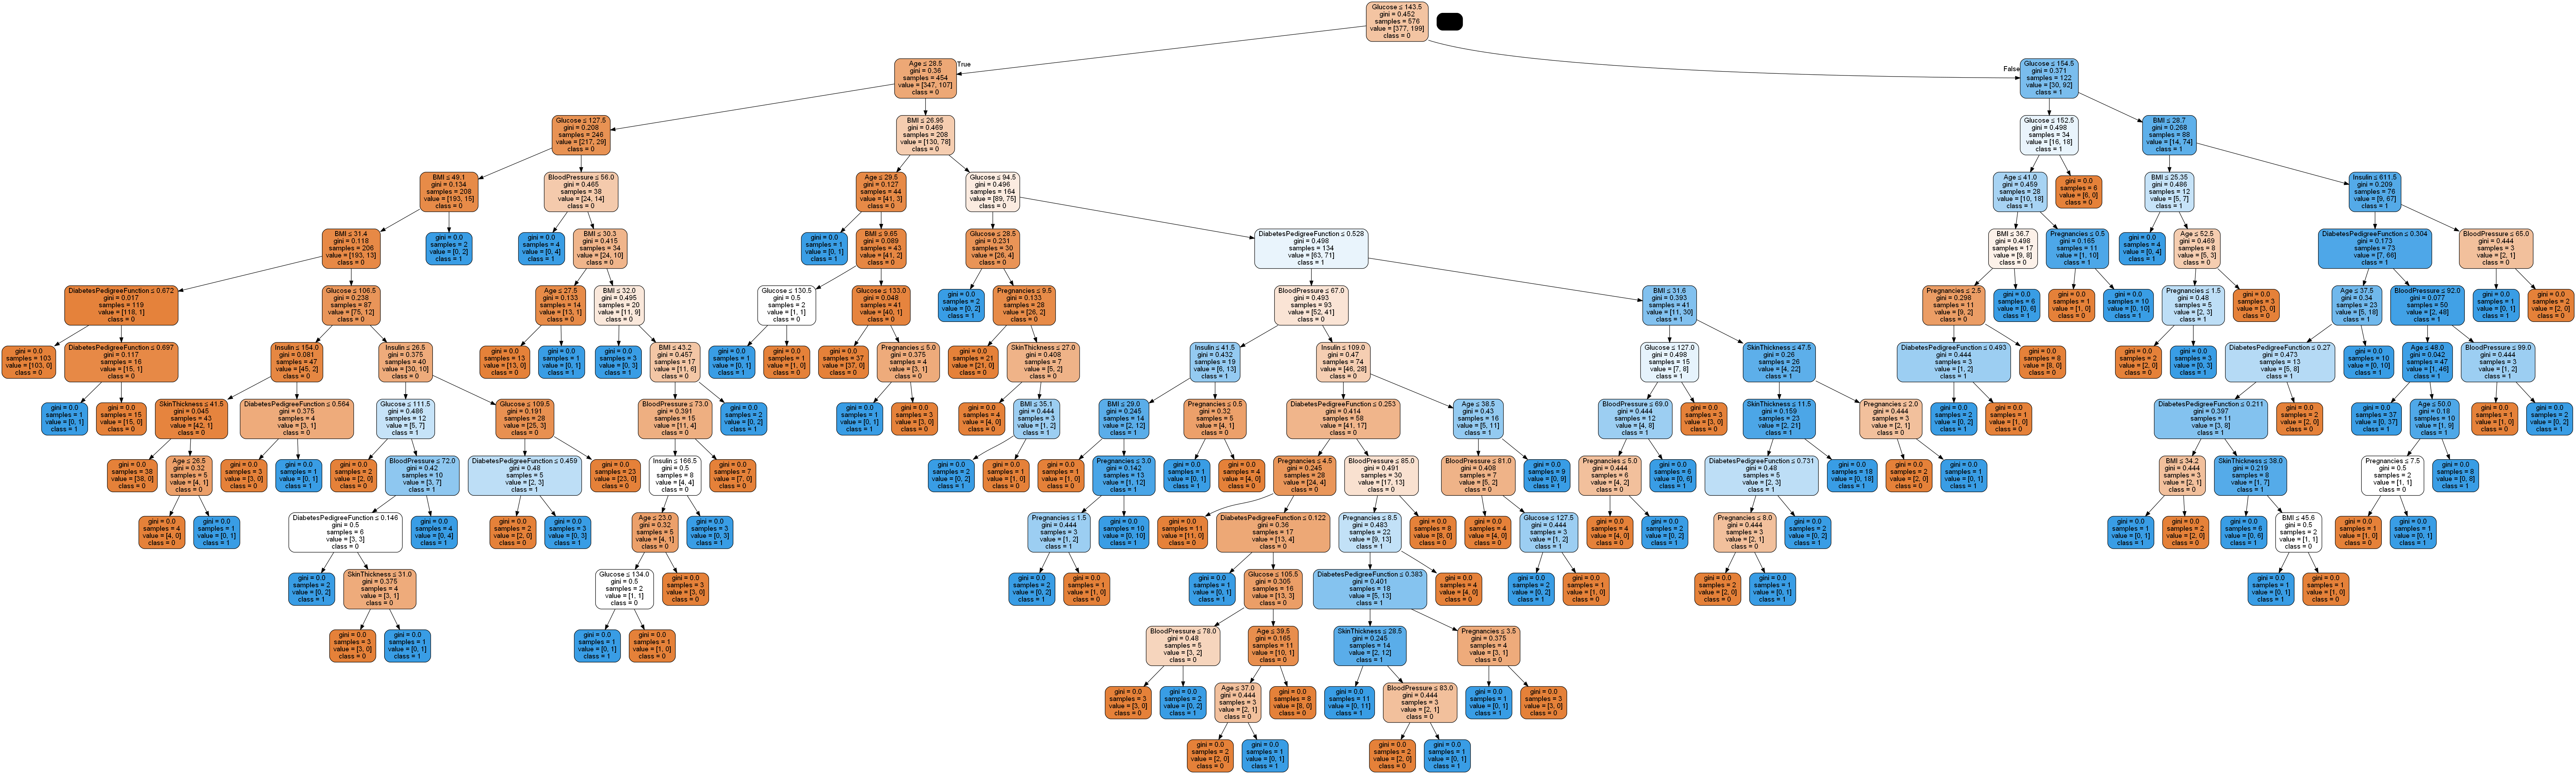

In [31]:
plot_tree(tree, 'diabetes.png')   # run the plot and create a png file
display(Image('diabetes.png'))    # display the png file

7.	Create a function which will allow to receive the model as input and based on that,
will do visualization on all features (y-axis) and feature importance (x-axis).

(-1.0, 8.0)

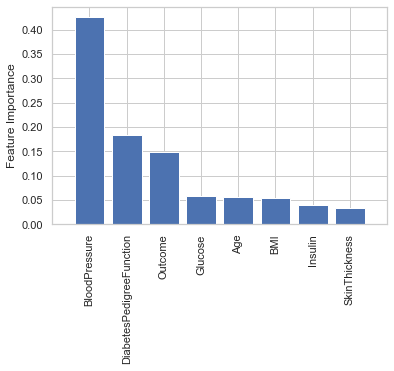

In [19]:
from sklearn.ensemble import RandomForestClassifier
# creating random forest classifier (default settings)
forest = RandomForestClassifier(n_estimators= 100,
                                criterion= 'gini',
                                max_depth = 10,
                                min_samples_leaf = 10,
                                min_samples_split = 69,
                                bootstrap = True,
                                oob_score = True,
                                random_state = 421)

forest.fit(X_train, np.ravel(y_train))      #fit the train data
importances = forest.feature_importances_   #fit the importances in forest

indices = np.argsort(importances)[::-1]     #sort by descending order

plt.ylabel('Feature Importance')            #vizualization on importances
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')

flabels = data_raw.columns[1:]
plt.xticks(range(X_train.shape[1]),
          flabels[indices], rotation = 90) 

plt.xlim([-1, X_train.shape[1]])
          

8.	Create Random Forest model, calculate the accuracy on training and testing set and call the above function (visualization based on feature importance) with same Random Forest model that you’ve created.

In [20]:
forest = RandomForestClassifier(n_estimators= 100,
                                criterion= 'gini',
                                max_depth = 10,
                                min_samples_leaf = 10,
                                min_samples_split = 69,
                                bootstrap = True,
                                oob_score = True,
                                random_state = 421)  # Random Forest Classifier with set parameters using gini

forest.fit(X_train, np.ravel(y_train))      #fit the train data
prediction = forest.predict(X_val)

score = forest.score(X_val, y_val)

print('Accuracy:   {:.0f}%'.format(score * 100))

Accuracy:   77%


In [21]:
# Feature Importance for Random Forest, numbers only

# create a list
imp = list(forest.feature_importances_)

# column names
feature_list = list(X_train)

# empty list
importances_list = []

# feature/importance in 1 list
for feature, importance in zip(feature_list, imp):
    importances_list.append((feature, round(importance, 2)))
    
# sorting by index in descending order
importances_list = sorted(importances_list, key = lambda i : i[1], reverse = True)

for feature, importance in importances_list:
    print('Feature {:10}  | Importance {}:'.format(feature, importance))
    

Feature Glucose     | Importance 0.43:
Feature BMI         | Importance 0.18:
Feature Age         | Importance 0.15:
Feature Pregnancies  | Importance 0.06:
Feature DiabetesPedigreeFunction  | Importance 0.06:
Feature Insulin     | Importance 0.05:
Feature SkinThickness  | Importance 0.04:
Feature BloodPressure  | Importance 0.03:


9.	Create SVM model. But first, create MinMaxScaler() and apply it to training and testing dataset. Then, calculate the accuracy to the new datasets using the SVM model that you’ve created.

In [22]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

svm = SVC(kernel = 'linear', C = 100, random_state = 111)

min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train, X_val)
y_val_minmax = min_max_scaler.fit_transform(y_train, y_val)

svm.fit(X_train_minmax, y_val_minmax)
# X_train_minmax
# X_val_minmax

scaled_score = svm.score(X_train_minmax, y_val_minmax)

print('Scaled Accuracy:   {:.0f}%'.format(scaled_score * 100))

Scaled Accuracy:   78%


F:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10.	Create MLPClassifier model. But first, create StandardScaler() and apply it to training and testing dataset. Then, calculate the accuracy to the new datasets using the MLPClassifier model that you’ve created.


In [23]:
# Standartization on X with z-score
def standardize(X):
    result = X.copy()
    
    for feature in X.columns:
        result[feature] = (X[feature] - X[feature].mean()) / X[feature].std()    # Z-score formula
    
    return result

X_train = standardize(X_train) 
X_val = standardize(X_val)



In [24]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes= (2),
                    activation= 'relu',
                    solver = 'adam',
                    alpha= 0.0001,
                    learning_rate_init = 0.0001,
                    max_iter = 500,
                    tol = 1e-4,
                    n_iter_no_change = 10,
                    verbose = True,
                    random_state = 99) # MLP Classifier with set parameters using relu and adam as solver

mlp.fit(X_train, np.ravel(y_train))

score = mlp.score(X_val, y_val)

print('MLPClassifier Accuracy:  {:.0f}%'.format(score * 100))

Iteration 1, loss = 1.24416298
Iteration 2, loss = 1.24343676
Iteration 3, loss = 1.24264196
Iteration 4, loss = 1.24187248
Iteration 5, loss = 1.24110226
Iteration 6, loss = 1.24035741
Iteration 7, loss = 1.23958518
Iteration 8, loss = 1.23882453
Iteration 9, loss = 1.23803841
Iteration 10, loss = 1.23727994
Iteration 11, loss = 1.23651306
Iteration 12, loss = 1.23574509
Iteration 13, loss = 1.23499786
Iteration 14, loss = 1.23422647
Iteration 15, loss = 1.23344461
Iteration 16, loss = 1.23269896
Iteration 17, loss = 1.23192898
Iteration 18, loss = 1.23116808
Iteration 19, loss = 1.23042534
Iteration 20, loss = 1.22964035
Iteration 21, loss = 1.22886470
Iteration 22, loss = 1.22812282
Iteration 23, loss = 1.22736633
Iteration 24, loss = 1.22659088
Iteration 25, loss = 1.22583650
Iteration 26, loss = 1.22510641
Iteration 27, loss = 1.22431118
Iteration 28, loss = 1.22355078
Iteration 29, loss = 1.22282441
Iteration 30, loss = 1.22207350
Iteration 31, loss = 1.22130215
Iteration 32, los

F:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Without standardization of the features we have a higher score

11.	Analyze all the results from all the modules and decide which one is the best for our case. 
Using that model, do a prediction of the future data and compare it with “Outcome” column (actual results).


In [25]:
# best accuracy score is with SVM svm (78%)
# prediction  

results = data_raw.copy()          

prediction = svm.predict(X_val)    # prediction variable and using the SVM

result_comparison = X_val.copy()   # .copy na X_val                
result_comparison['SVM'] = np.round(prediction) # our prediction
result_comparison['Outcome'] = y_val.copy()     # original set

result_comparison.head(20)


F:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,SVM,Outcome
668,0.519989,-0.747781,-0.450591,0.705788,0.994266,0.228492,-0.168395,0.705863,0.0,0
324,-0.608123,-0.304163,0.322663,0.648586,-0.694084,0.425168,-1.087783,-1.058377,0.0,0
624,-0.608123,-0.430911,-0.177678,-1.181875,-0.694084,-0.141723,-1.055180,-1.058377,0.0,0
690,1.084045,-0.462598,0.550090,-1.181875,-0.694084,-0.859013,1.220468,-0.015871,0.0,0
473,0.802017,0.456326,1.004945,-1.181875,-0.694084,-0.245845,-0.885648,1.267212,0.0,0
204,0.519989,-0.589346,0.186206,0.648586,0.994266,0.656552,-0.513980,1.668176,0.0,0
97,-0.890151,-1.603331,-0.905445,-0.152241,-0.018744,-1.344919,-0.517241,-0.978184,0.0,0
336,-1.172179,-0.145727,-3.088748,-1.181875,-0.694084,0.205353,1.468246,0.786056,1.0,0
568,-0.044067,1.026693,0.186206,0.476981,0.425559,-0.083877,-0.468337,0.224707,0.0,0
148,0.237961,0.804884,0.459119,-1.181875,-0.694084,0.193784,-0.859566,2.470103,1.0,0
